## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import tensorflow as tf
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [10]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)


In [11]:
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_test shape (10000, 28, 28)
y_test shape (10000,)


In [0]:
""

### Find dimensions of an image in the dataset

In [13]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
Y_train=tf.keras.utils.to_categorical(y_train)
Y_test=tf.keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [47]:
X_train=x_train/255
X_train.shape

(60000, 28, 28)

In [0]:
X_test=x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
X_train =X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test =X_test.reshape(X_test.shape[0], 28, 28, 1)

In [51]:
X_train[0].shape

(28, 28, 1)

In [52]:
X_test[0].shape

(28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:

es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='auto', patience=5)

In [63]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=32,callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2451 - acc: 0.9089 - val_loss: 0.2719 - val_acc: 0.9007
Epoch 2/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1816 - acc: 0.9315 - val_loss: 0.2514 - val_acc: 0.9092
Epoch 3/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1314 - acc: 0.9501 - val_loss: 0.2802 - val_acc: 0.9122
Epoch 4/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0912 - acc: 0.9658 - val_loss: 0.3126 - val_acc: 0.9059
Epoch 5/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0638 - acc: 0.9762 - val_loss: 0.3462 - val_acc: 0.9087
Epoch 6/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0432 - acc: 0.9848 - val_loss: 0.4082 - val_acc: 0.9105
Epoch 7/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0341 - acc: 0.9874 - val_l

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='auto', patience=5)

In [73]:
model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=32,callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3700 - acc: 0.8673 - val_loss: 0.2948 - val_acc: 0.8884
Epoch 2/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2432 - acc: 0.9111 - val_loss: 0.2613 - val_acc: 0.9058
Epoch 3/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1956 - acc: 0.9261 - val_loss: 0.2273 - val_acc: 0.9213
Epoch 4/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1608 - acc: 0.9397 - val_loss: 0.2384 - val_acc: 0.9191
Epoch 5/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1368 - acc: 0.9498 - val_loss: 0.2587 - val_acc: 0.9121
Epoch 6/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1149 - acc: 0.9580 - val_loss: 0.2528 - val_acc: 0.9232
Epoch 7/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0989 - acc: 0.9621 - val_l

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

img_gen.fit(X_train)

img_gen.fit(X_test)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

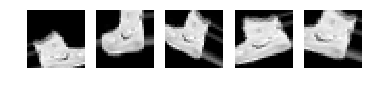

In [81]:
from matplotlib import pyplot as plt
gen = img_gen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='auto', patience=5)

BS = 50




In [101]:
Y_train.shape

(60000, 10)

In [92]:
model2.fit_generator(img_gen.flow(X_train, Y_train, batch_size=BS),	validation_data=(X_test, Y_test), steps_per_epoch=len(X_train) // BS,	epochs=10)

Epoch 1/10
1200/1200 [==============================] - 19s 16ms/step - loss: 0.9943 - acc: 0.5532 - val_loss: 0.6399 - val_acc: 0.7556
Epoch 2/10
1200/1200 [==============================] - 18s 15ms/step - loss: 0.7585 - acc: 0.7104 - val_loss: 0.5656 - val_acc: 0.7852
Epoch 3/10
1200/1200 [==============================] - 18s 15ms/step - loss: 0.6910 - acc: 0.7358 - val_loss: 0.5841 - val_acc: 0.7761
Epoch 4/10
1200/1200 [==============================] - 18s 15ms/step - loss: 0.6520 - acc: 0.7518 - val_loss: 0.6875 - val_acc: 0.7503
Epoch 5/10
1200/1200 [==============================] - 18s 15ms/step - loss: 0.6171 - acc: 0.7659 - val_loss: 0.5282 - val_acc: 0.8077
Epoch 6/10
1200/1200 [==============================] - 18s 15ms/step - loss: 0.5976 - acc: 0.7756 - val_loss: 0.6225 - val_acc: 0.7739
Epoch 7/10
1200/1200 [==============================] - 18s 15ms/step - loss: 0.5738 - acc: 0.7849 - val_loss: 0.6194 - val_acc: 0.7756
Epoch 8/10
1200/1200 [==========================

###  Report the final train and validation accuracy

In [94]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc multiple                  4         
_________________________________________________________________
conv2d_24 (Conv2D)           multiple                  320       
_________________________________________________________________
conv2d_25 (Conv2D)           multiple                  9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_12 (Flatten)         multiple                  0         
_________________________________________________________________
dropout_10 (Dropout)         multiple                  0         
_________________________________________________________________
dense_24 (Dense)             multiple                

In [99]:
print("train score", model2.evaluate(X_train,Y_train))

60000/60000 [==============================] - 5s 80us/sample - loss: 0.5338 - acc: 0.7979
train score [0.5337540677150091, 0.79791665]


In [103]:
print("test score", model2.evaluate(X_test,Y_test))

10000/10000 [==============================] - 1s 79us/sample - loss: 0.5531 - acc: 0.7913
test score [0.5530991406917573, 0.7913]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
import tensorflow as tf
from keras.datasets import cifar10
import pandas as pd


### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [137]:
x_train.shape

(50000, 32, 32, 3)

In [144]:
x_test.shape

(10000, 32, 32, 3)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
   data_gen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             rotation_range=30,
                                                             shear_range=0.2,
                                                             zoom_range=0.3)
          

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(x_train)
data_gen.fit(x_test)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

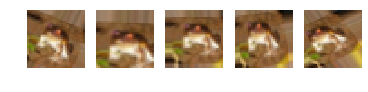

In [148]:
from matplotlib import pyplot as plt
import numpy as np
gen = data_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype(np.uint8).squeeze())
    plt.plot()
plt.show()